In [6]:
# create copies of the "healthy" and "hearing impaired" folders
import shutil
import os

# Path to the original folders
healthy_folder_path = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Healthy'
hearing_impaired_folder_path = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Hearing Impaired'

# Destination paths for the copied folders
copied_healthy_folder_path = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/temp/Healthy'
copied_hearing_impaired_folder_path = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/temp/Hearing Impaired'

# Create copies of the folders
shutil.copytree(healthy_folder_path, copied_healthy_folder_path)
shutil.copytree(hearing_impaired_folder_path, copied_hearing_impaired_folder_path)


'/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/temp/Hearing Impaired'

In [2]:
# Randomly select two subjects from each folder.
import os
import random

def random_subjects(folder_path, num_subjects):
    # Get a list of all subjects in the folder
    subjects = os.listdir(folder_path)

    # Randomly select two subjects
    selected_subjects = random.sample(subjects, num_subjects)

    return selected_subjects

# Example usage:
# healthy_folder_path = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/temp/Healthy'
# hearing_impaired_folder_path = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/temp/Hearing Impaired'

healthy_folder_path = '/home/wangg/REU-Hearing-Loss-Project/machine learning/temp/Healthy'
hearing_impaired_folder_path = '/home/wangg/REU-Hearing-Loss-Project/machine learning/temp/Hearing Impaired'
num_subjects_to_select = 2

selected_healthy_subjects = random_subjects(healthy_folder_path, num_subjects_to_select)
selected_hearing_impaired_subjects = random_subjects(hearing_impaired_folder_path, num_subjects_to_select)

print("Selected Healthy Subjects:", selected_healthy_subjects)
print("Selected Hearing Impaired Subjects:", selected_hearing_impaired_subjects)


Selected Healthy Subjects: ['Subject_033', 'Subject_030']
Selected Hearing Impaired Subjects: ['Subject_017', 'Subject_008']


Create folders in bash

In [ ]:
# Navigate to the specified directory
cd /home/wangg/REU-Hearing-Loss-Project/machine\ learning/allFolds/10folds-80-20 train test split

# Create 10 fold directories (fold1, fold2, ..., fold10)
for i in {1..10}; do
    mkdir -p fold$i/{train,test,Training,Testing}
done

In [36]:
# Create a testing folder with images from these selected subjects, labeled accordingly. (DANGER)
import os
import shutil


def create_testing_folder(source_folder, selected_subjects, destination_folder, label):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Copy images from selected subjects to the testing folder with labels
    for subject_name in selected_subjects:
        subject_folder_path = os.path.join(source_folder, subject_name)
        data_files = os.listdir(subject_folder_path)

        for data_file in data_files:
            source_path = os.path.join(subject_folder_path, data_file)
            
            # Append the label to the file name
            labeled_file_name = f"{label}_{subject_name}_{data_file}"
            
            destination_path = os.path.join(destination_folder, labeled_file_name)
            
            # Copy the image to the testing folder
            shutil.copyfile(source_path, destination_path)


selected_healthy_subjects = ['Subject_023', 'Subject_031', 'Subject_022', 'Subject_027']
selected_hearing_impaired_subjects = ['Subject_019', 'Subject_002', 'Subject_042', 'Subject_001']


healthy_folder_path = '/home/wangg/REU-Hearing-Loss-Project/machine learning/temp/Healthy'
hearing_impaired_folder_path = '/home/wangg/REU-Hearing-Loss-Project/machine learning/temp/Hearing Impaired'

destination_testing_folder = '/home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/10folds- 80-20 train test split/fold10/test'
# Example usage for the "Healthy" folder
create_testing_folder(healthy_folder_path, selected_healthy_subjects, destination_testing_folder, label="Healthy")

# Example usage for the "Hearing Impaired" folder
create_testing_folder(hearing_impaired_folder_path, selected_hearing_impaired_subjects, destination_testing_folder, label="Hearing_Impaired")


In [46]:
# script to add all subjects to a new folder, but remove the selected_healthy_subjects and 
# selected_hearing_impaired_subjects AND ALSO labels the images
import os
import os
import shutil

def create_training_folder(source_folder, selected_subjects, destination_folder, label):
    # Ensure the destination folder exists or create it
    # os.makedirs(destination_folder, exist_ok=True)

    # Get a list of all subjects in the source folder
    all_subjects = [subject for subject in os.listdir(source_folder) if not subject.startswith('.')]
    
    # Exclude the selected subjects
    remaining_subjects = list(set(all_subjects) - set(selected_subjects))

        # Copy images from selected subjects to the testing folder with labels
    for subject_name in remaining_subjects:
        subject_folder_path = os.path.join(source_folder, subject_name)
        data_files = os.listdir(subject_folder_path)

        for data_file in data_files:
            source_path = os.path.join(subject_folder_path, data_file)
            
            # Append the label to the file name
            labeled_file_name = f"{label}_{subject_name}_{data_file}"
            
            destination_path = os.path.join(destination_folder, labeled_file_name)
            
            # Copy the image to the testing folder
            shutil.copyfile(source_path, destination_path)


# Example usage:
source_folder_healthy = '/home/wangg/REU-Hearing-Loss-Project/machine learning/temp/Healthy'
source_folder_hearing_impaired = '/home/wangg/REU-Hearing-Loss-Project/machine learning/temp/Hearing Impaired'
destination_folder = '/home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/10folds- 80-20 train test split/fold10/train'


# Example selected subjects (replace this with your actual selected subjects)
selected_healthy_subjects = ['Subject_023', 'Subject_031', 'Subject_022', 'Subject_027']
selected_hearing_impaired_subjects = ['Subject_019', 'Subject_002', 'Subject_042', 'Subject_001']
# selected_healthy_subjects = ['Subject_021', 'Subject_022']
# selected_hearing_impaired_subjects = ['Subject_001', 'Subject_002']

# selected_healthy_subjects = ['Subject_023', 'Subject_024']
# selected_hearing_impaired_subjects = ['Subject_003', 'Subject_004']

# selected_healthy_subjects = ['Subject_025', 'Subject_026']
# selected_hearing_impaired_subjects = ['Subject_005', 'Subject_006']

# selected_healthy_subjects = ['Subject_027', 'Subject_028']
# selected_hearing_impaired_subjects = ['Subject_007', 'Subject_008']

# selected_healthy_subjects = ['Subject_029', 'Subject_030']
# selected_hearing_impaired_subjects = ['Subject_009', 'Subject_010']

# selected_healthy_subjects =  ['Subject_031', 'Subject_032']
# selected_hearing_impaired_subjects =['Subject_011', 'Subject_012']

# selected_healthy_subjects = ['Subject_033', 'Subject_034']
# selected_hearing_impaired_subjects =['Subject_013', 'Subject_014']

# selected_healthy_subjects = ['Subject_035', 'Subject_036']
# selected_hearing_impaired_subjects = ['Subject_015', 'Subject_016']

# selected_healthy_subjects = ['Subject_037', 'Subject_038']
# selected_hearing_impaired_subjects = ['Subject_017', 'Subject_018']


# selected_healthy_subjects = ['Subject_039', 'Subject_040']
# selected_hearing_impaired_subjects =['Subject_019', 'Subject_020']
# Create the training folder
create_training_folder(source_folder_healthy, selected_healthy_subjects, destination_folder, label="Healthy")
create_training_folder(source_folder_hearing_impaired, selected_hearing_impaired_subjects, destination_folder, label="Hearing_Impaired")


In [47]:
# script to move all healthy labeled images to a healthy folder and move all hearing impaired 
# labeled images to a hearing impaired folder for this type of structure.

# with this form for 5 folds:
#     Folds
# Fold1
# Test

# 160 labeled images (80 healthy labeled images, 80 hearing impaired labeled images)
# Training
# 1600 labeled images (800 healthy labeled images, 800 hearing impaired labeled images
# Fold2
# Test
# 160 labeled images (80 healthy labeled images, 80 hearing impaired labeled images)
# Training
# 1600 labeled images (800 healthy labeled images, 800 hearing impaired labeled images
# ...

# go through 
import os
import shutil

def organize_fold_structure(fold_path):
    # Create the new structure: FoldX/Testing/Healthy, FoldX/Testing/Hearing_Impaired, FoldX/Training/Healthy, FoldX/Training/Hearing_Impaired
    testing_path = os.path.join(fold_path, 'Testing')
    os.makedirs(os.path.join(testing_path, 'Healthy'), exist_ok=True)
    os.makedirs(os.path.join(testing_path, 'Hearing_Impaired'), exist_ok=True)

    training_path = os.path.join(fold_path, 'Training')
    os.makedirs(os.path.join(training_path, 'Healthy'), exist_ok=True)
    os.makedirs(os.path.join(training_path, 'Hearing_Impaired'), exist_ok=True)

    # Move images to the new structure
    move_images_by_label(os.path.join(fold_path, 'test'), os.path.join(testing_path, 'Healthy'), os.path.join(testing_path, 'Hearing_Impaired'))
    move_images_by_label(os.path.join(fold_path, 'train'), os.path.join(training_path, 'Healthy'), os.path.join(training_path, 'Hearing_Impaired'))

def move_images_by_label(source_folder, healthy_folder, hearing_impaired_folder):
    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            if 'healthy' in filename.lower():
                destination_path = os.path.join(healthy_folder, filename)
            elif 'hearing_impaired' in filename.lower():
                destination_path = os.path.join(hearing_impaired_folder, filename)
            else:
                print(f"Unknown label for file: {filename}")
                continue

            shutil.move(source_path, destination_path)

# Specify the path to your Folds directory
folds_path = '/home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/10folds- 80-20 train test split'

# Organize the structure for each fold
for fold_number in range(1, 11):
    fold_path = os.path.join(folds_path, f'fold{fold_number}')
    organize_fold_structure(fold_path)


NOT A PART OF K FOLD BELOW

In [2]:
# go into the existing database data is organized as follows and take out 2 healthy subjects and take out 
# 2 hearing impaired subjects and add them to the testing folder 

import os
import shutil
import random

# Specify the root directory for data organization
root_directory = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject'
train_directory = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/experiment with data split by subject/train'
test_directory = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/experiment with data split by subject/test'

# Number of subjects to select for testing
num_test_subjects_per_class = 2

# # Function to copy images from source to destination
# def copy_images(source_path, destination_path):
#     for root, dirs, files in os.walk(source_path):
#         for file in files:
#             source_file_path = os.path.join(root, file)
#             destination_file_path = os.path.join(destination_path, file)
#             shutil.copyfile(source_file_path, destination_file_path)

# Function to randomly select subjects for testing
def select_test_subjects(class_directory):
    all_subjects = os.listdir(class_directory)
    test_subjects = random.sample(all_subjects, num_test_subjects_per_class)
    return test_subjects

# Copy Healthy subjects to testing folder
healthy_directory = os.path.join(root_directory, 'Healthy')
test_healthy_directory = os.path.join(test_directory, 'Healthy')
os.makedirs(test_healthy_directory, exist_ok=True)

selected_healthy_subjects = select_test_subjects(healthy_directory)
for subject in selected_healthy_subjects:
    source_subject_path = os.path.join(healthy_directory, subject)
    destination_subject_path = os.path.join(test_healthy_directory, subject)
    shutil.copytree(source_subject_path, destination_subject_path)

# Copy Hearing Impaired subjects to testing folder
hearing_impaired_directory = os.path.join(root_directory, 'Hearing Impaired')
test_hearing_impaired_directory = os.path.join(test_directory, 'Hearing Impaired')
os.makedirs(test_hearing_impaired_directory, exist_ok=True)

selected_hearing_impaired_subjects = select_test_subjects(hearing_impaired_directory)
for subject in selected_hearing_impaired_subjects:
    source_subject_path = os.path.join(hearing_impaired_directory, subject)
    destination_subject_path = os.path.join(test_hearing_impaired_directory, subject)
    shutil.copytree(source_subject_path, destination_subject_path)

print("Testing data has been populated with selected subjects.")


Testing data has been populated with selected subjects.


In [2]:
# script to go through each image within each folder to filter out non-image data like .DS_store
import os

def filter_non_images(folder_path):
    # Get a list of all files in the folder
    all_files = os.listdir(folder_path)

    # Filter out non-image files (you can customize the list of valid extensions)
    valid_extensions = ['.png']
    image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in valid_extensions)]

    # Filtered files
    non_image_files = list(set(all_files) - set(image_files))

    return non_image_files

# Root folder containing the k-fold data
root_folder = '/home/wangg/REU-Hearing-Loss-Project/machine learning/folds'

# Iterate through each fold
for fold_number in range(6, 11):
    fold_path = os.path.join(root_folder, f'Fold{fold_number}')

    # Test folder
    test_folder_path = os.path.join(fold_path, 'test')
    test_non_image_files = filter_non_images(test_folder_path)

    print(f'\nFold {fold_number} - Test Folder:')
    print('Non-Image Files:', test_non_image_files)

    # Training folder
    training_folder_path = os.path.join(fold_path, 'train')
    training_non_image_files = filter_non_images(training_folder_path)

    print(f'\nFold {fold_number} - Training Folder:')
    print('Non-Image Files:', training_non_image_files)


FileNotFoundError: [Errno 2] No such file or directory: '/home/wangg/REU-Hearing-Loss-Project/machine learning/folds/Fold6/test'

In [3]:
# script if each fold folder follows the structure you mentioned (with 'testing' and 'training' subfolders, and further subfolders for 'Healthy' and 'Hearing impaired')

import os

def filter_non_images(folder_path):
    # Get a list of all files in the folder
    all_files = os.listdir(folder_path)

    # Filter out non-image files (you can customize the list of valid extensions)
    valid_extensions = ['.png']
    image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in valid_extensions)]

    # Filtered files
    non_image_files = list(set(all_files) - set(image_files))

    return non_image_files

# Root folder containing the k-fold data
root_folder = '/home/wangg/REU-Hearing-Loss-Project/machine learning/folds'

# Iterate through each fold
for fold_number in range(6, 11):
    fold_path = os.path.join(root_folder, f'fold{fold_number}')

    # Test folder
    test_folder_path = os.path.join(fold_path, 'Testing')
    test_non_image_files = filter_non_images(test_folder_path)

    print(f'\nFold {fold_number} - Test Folder:')
    print('Non-Image Files:', test_non_image_files)

    # Training folder
    training_folder_path = os.path.join(fold_path, 'Training')
    training_non_image_files = filter_non_images(training_folder_path)

    print(f'\nFold {fold_number} - Training Folder:')
    print('Non-Image Files:', training_non_image_files)



Fold 6 - Test Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 6 - Training Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 7 - Test Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 7 - Training Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 8 - Test Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 8 - Training Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 9 - Test Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 9 - Training Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 10 - Test Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 10 - Training Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']


In [30]:
# script to move all healthy labeled images to a healthy folder and move all hearing impaired 
# labeled images to a hearing impaired folder for this type of structure.

# with this form for 5 folds:
#     Folds
# Fold1
# Test

# 160 labeled images (80 healthy labeled images, 80 hearing impaired labeled images)
# Training
# 1600 labeled images (800 healthy labeled images, 800 hearing impaired labeled images
# Fold2
# Test
# 160 labeled images (80 healthy labeled images, 80 hearing impaired labeled images)
# Training
# 1600 labeled images (800 healthy labeled images, 800 hearing impaired labeled images
# ...

# go through 
import os
import shutil

def organize_fold_structure(fold_path):
    # Create the new structure: FoldX/Testing/Healthy, FoldX/Testing/Hearing_Impaired, FoldX/Training/Healthy, FoldX/Training/Hearing_Impaired
    testing_path = os.path.join(fold_path, 'Testing')
    os.makedirs(os.path.join(testing_path, 'Healthy'), exist_ok=True)
    os.makedirs(os.path.join(testing_path, 'Hearing_Impaired'), exist_ok=True)

    training_path = os.path.join(fold_path, 'Training')
    os.makedirs(os.path.join(training_path, 'Healthy'), exist_ok=True)
    os.makedirs(os.path.join(training_path, 'Hearing_Impaired'), exist_ok=True)

    # Move images to the new structure
    move_images_by_label(os.path.join(fold_path, 'test'), os.path.join(testing_path, 'Healthy'), os.path.join(testing_path, 'Hearing_Impaired'))
    move_images_by_label(os.path.join(fold_path, 'train'), os.path.join(training_path, 'Healthy'), os.path.join(training_path, 'Hearing_Impaired'))

def move_images_by_label(source_folder, healthy_folder, hearing_impaired_folder):
    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            if 'healthy' in filename.lower():
                destination_path = os.path.join(healthy_folder, filename)
            elif 'hearing_impaired' in filename.lower():
                destination_path = os.path.join(hearing_impaired_folder, filename)
            else:
                print(f"Unknown label for file: {filename}")
                continue

            shutil.move(source_path, destination_path)

# Specify the path to your Folds directory
folds_path = '/home/wangg/REU-Hearing-Loss-Project/machine learning/newFolds'

# Organize the structure for each fold
for fold_number in range(1, 11):
    fold_path = os.path.join(folds_path, f'fold{fold_number}')
    organize_fold_structure(fold_path)


In [4]:
from collections import defaultdict

# Define subjects for each fold
folds = {
    1: (['Subject_036', 'Subject_044'], ['Subject_017', 'Subject_019']),
    2: (['Subject_027', 'Subject_031'], ['Subject_001', 'Subject_009']),
    3: (['Subject_044', 'Subject_040'], ['Subject_002', 'Subject_042']),
    4: (['Subject_022', 'Subject_026'], ['Subject_007', 'Subject_014']),
    5: (['Subject_030', 'Subject_037'], ['Subject_008', 'Subject_003']),
    6: (['Subject_021', 'Subject_036'], ['Subject_042', 'Subject_014']),
    7: (['Subject_040', 'Subject_044'], ['Subject_013', 'Subject_007']),
    8: (['Subject_033', 'Subject_035'], ['Subject_003', 'Subject_042']),
    9: (['Subject_029', 'Subject_033'], ['Subject_015', 'Subject_008']),
    10: (['Subject_021', 'Subject_031'], ['Subject_020', 'Subject_006'])
}

# Create a defaultdict to count occurrences of each subject
subject_count = defaultdict(int)

# Iterate through folds and count subjects
for fold, (healthy, impaired) in folds.items():
    for subject in healthy + impaired:
        subject_count[subject] += 1

# Print the counts
for subject, count in subject_count.items():
    print(f"{subject}: {count} occurrences")


Subject_036: 2 occurrences
Subject_044: 3 occurrences
Subject_017: 1 occurrences
Subject_019: 1 occurrences
Subject_027: 1 occurrences
Subject_031: 2 occurrences
Subject_001: 1 occurrences
Subject_009: 1 occurrences
Subject_040: 2 occurrences
Subject_002: 1 occurrences
Subject_042: 3 occurrences
Subject_022: 1 occurrences
Subject_026: 1 occurrences
Subject_007: 2 occurrences
Subject_014: 2 occurrences
Subject_030: 1 occurrences
Subject_037: 1 occurrences
Subject_008: 2 occurrences
Subject_003: 2 occurrences
Subject_021: 2 occurrences
Subject_013: 1 occurrences
Subject_033: 2 occurrences
Subject_035: 1 occurrences
Subject_029: 1 occurrences
Subject_015: 1 occurrences
Subject_020: 1 occurrences
Subject_006: 1 occurrences


In [1]:
# code for cropping all the images so they're normalized to 224 x 224

from PIL import Image
import os

# Define the paths to the folders that need cropping
folders = [
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\N1\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\N1\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\N2\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\N2\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P1\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P1\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P2\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P2\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P3\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P3\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\N1\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\N1\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\N2\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\N2\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P1\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P1\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P2\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P2\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P3\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P3\Hearing Impaired'
# r'C:\Users\student\Documents\snhl-ERP\machine learning\generalized-dataset\Healthy',
# r'C:\Users\student\Documents\snhl-ERP\machine learning\generalized-dataset\Hearimg Impaired',
# r'C:\Users\student\Documents\snhl-ERP\machine learning\N1\Hearing Impaired',
# r'C:\Users\student\Documents\snhl-ERP\machine learning\N1\Not Hearing Impaired'
# r'C:\Users\student\Documents\snhl-ERP\machine learning\10ms interval dataset\Hearing Impaired- 10ms interval',
# r'C:\Users\student\Documents\snhl-ERP\machine learning\10ms interval dataset\Not Hearing Impaired- 10ms interval',
# r'C:\Users\student\Documents\snhl-ERP\machine learning\8ms interval dataset\Hearing Impaired- 8ms interval',
# r'C:\Users\student\Documents\snhl-ERP\machine learning\8ms interval dataset\Not Hearing Impaired- 8ms interval'
]

# Iterate over the specified folders
for folder in folders:
    # Iterate over the files in the folder
    for file in os.listdir(folder):
        # Check if the file is an image file
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            # Construct the full file path
            file_path = os.path.join(folder, file)

            # Open the image using PIL
            image = Image.open(file_path)

            # Get the dimensions of the image
            width, height = image.size

            # These are the parameters below for cropping each image
            size = 490
            left = 160  # Modify this value to adjust the leftmost position of the crop
            right = left + size  # Keep the rightmost position as the size of the square
            top = 73
            bottom = top + size

            # Crop the image to the center square
            cropped_image = image.crop((left, top, right, bottom))

            # Resize the image to (224, 224)
            resized_image = cropped_image.resize((224, 224))

            # Replace the original image with the cropped and resized image
            resized_image.save(file_path)


In [9]:
# script to separate images based on the subject number in their filenames,
import os
import shutil

# Path to the directory containing the images
image_directory = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/split data 80-10-10/Healthy'

# Path to the directory where the folders will be created
target_directory = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Healthy'

# Iterate through each file in the directory
for filename in os.listdir(image_directory):
    # Check if the file is a PNG image and contains the word "sub"
    if filename.endswith('.png') and 'sub' in filename:
        # Extract subject number from the filename
        subject_number = filename.split('sub-')[1].split('.')[0]
        
        # Create a folder for the subject if it doesn't exist
        subject_folder = os.path.join(target_directory, f'Subject_{subject_number}')
        os.makedirs(subject_folder, exist_ok=True)
        
        # Copy the image to the subject-specific folder
        source_path = os.path.join(image_directory, filename)
        destination_path = os.path.join(subject_folder, filename)
        shutil.copy(source_path, destination_path)
        print(f"Copied {filename} to {subject_folder}")

print("Images copied based on subject number.")


Copied topographic_map_millisecond_2.200000e+02ms_sub-031.png to /Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Healthy/Subject_031
Copied topographic_map_millisecond_390ms_sub-038.png to /Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Healthy/Subject_038
Copied topographic_map_millisecond_2.200000e+02ms_sub-025.png to /Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Healthy/Subject_025
Copied topographic_map_millisecond_70ms_sub-029.png to /Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Healthy/Subject_029
Copied topographic_map_millisecond_170ms_sub-022.png to /Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by s

In [2]:
import random

# Initial lists of subjects
all_healthy_subjects = [
    'Subject_021', 'Subject_022', 'Subject_023', 'Subject_024',
   'Subject_025', 'Subject_026', 'Subject_027', 'Subject_028',
   'Subject_029', 'Subject_030', 'Subject_031', 'Subject_032',
   'Subject_033', 'Subject_034', 'Subject_035', 'Subject_036',
   'Subject_037', 'Subject_038', 'Subject_039', 'Subject_040',
   'Subject_043', 'Subject_044'
]
all_hearing_impaired_subjects = [
   'Subject_001', 'Subject_005', 'Subject_009', 'Subject_020',
   'Subject_002', 'Subject_006', 'Subject_008', 'Subject_010', 'Subject_014',
   'Subject_003', 'Subject_007', 'Subject_011', 'Subject_015',
   'Subject_004', 'Subject_042', 'Subject_012', 'Subject_016',
   'Subject_017', 'Subject_041', 'Subject_013', 'Subject_018', 'Subject_019']

# Function to create folds
def create_fold(healthy_subjects, impaired_subjects):
    fold = random.sample(healthy_subjects, 4) + random.sample(impaired_subjects, 4)
    # random.shuffle(fold)
    return fold

# Creating 10 folds
for fold_number in range(1, 11):
    selected_healthy_subjects = create_fold(all_healthy_subjects, all_hearing_impaired_subjects)[:4]
    selected_hearing_impaired_subjects = create_fold(all_healthy_subjects, all_hearing_impaired_subjects)[4:]
    
    # Displaying the results for each fold
    print(f"Fold {fold_number}:")
    print("selected_healthy_subjects = ", selected_healthy_subjects)
    print("selected_hearing_impaired_subjects = ", selected_hearing_impaired_subjects)
    print()


Fold 1:
Selected Healthy Subjects: ['Subject_034', 'Subject_030', 'Subject_035', 'Subject_033']
Selected Impaired Subjects: ['Subject_012', 'Subject_020', 'Subject_018', 'Subject_004']

Fold 2:
Selected Healthy Subjects: ['Subject_037', 'Subject_032', 'Subject_039', 'Subject_021']
Selected Impaired Subjects: ['Subject_041', 'Subject_011', 'Subject_002', 'Subject_004']

Fold 3:
Selected Healthy Subjects: ['Subject_034', 'Subject_033', 'Subject_024', 'Subject_029']
Selected Impaired Subjects: ['Subject_002', 'Subject_009', 'Subject_003', 'Subject_042']

Fold 4:
Selected Healthy Subjects: ['Subject_039', 'Subject_032', 'Subject_038', 'Subject_026']
Selected Impaired Subjects: ['Subject_004', 'Subject_010', 'Subject_015', 'Subject_005']

Fold 5:
Selected Healthy Subjects: ['Subject_037', 'Subject_025', 'Subject_044', 'Subject_034']
Selected Impaired Subjects: ['Subject_004', 'Subject_042', 'Subject_020', 'Subject_013']

Fold 6:
Selected Healthy Subjects: ['Subject_034', 'Subject_021', 'Sub

Boxplot related scripts

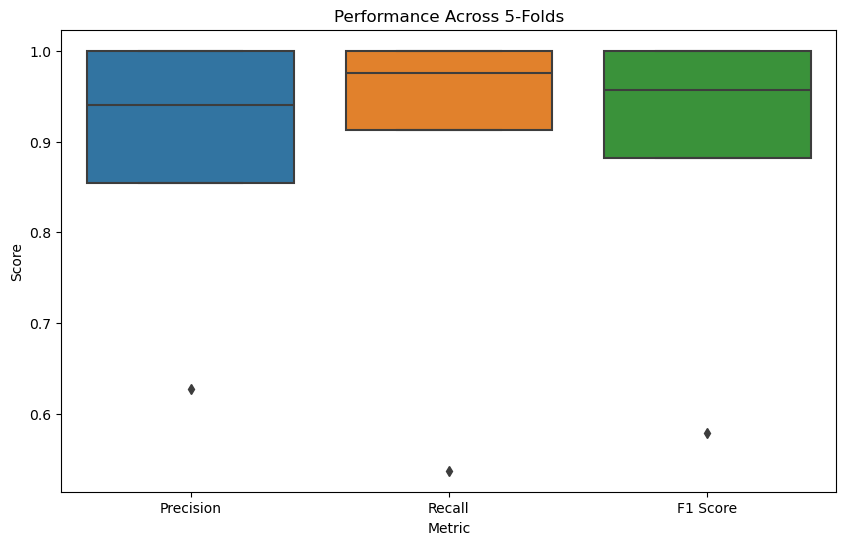


Summary of Results:
           Worst Fold  Avg. Fold  Best Fold
Metric                                     
F1 Score     0.579125   0.883671        1.0
Precision    0.627737   0.884259        1.0
Recall       0.537500   0.885000        1.0


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Precision, Recall, and F1 lists for each fold
precision_list = [0.6277372262773723, 0.8538011695906432, 0.9397590361445783, 1.0, 1.0]
recall_list = [0.5375, 0.9125, 0.975, 1.0, 1.0]
f1_list = [0.5791245791245792, 0.8821752265861027, 0.9570552147239264, 1.0, 1.0]

# Create a DataFrame for easy summary and visualization
df_results = pd.DataFrame({
    'Fold': np.repeat(range(1, 6), 3),
    'Metric': ['Precision'] * 5 + ['Recall'] * 5 + ['F1 Score'] * 5,
    'Score': precision_list + recall_list + f1_list
})

# Visualize the results with a single boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Score', data=df_results)
plt.title('Performance Across 5-Folds')
plt.show()

# Summary table
summary_table = df_results.groupby('Metric')['Score'].describe()[['min', 'mean', 'max']]
summary_table.columns = ['Worst Fold', 'Avg. Fold', 'Best Fold']
print("\nSummary of Results:")
print(summary_table)


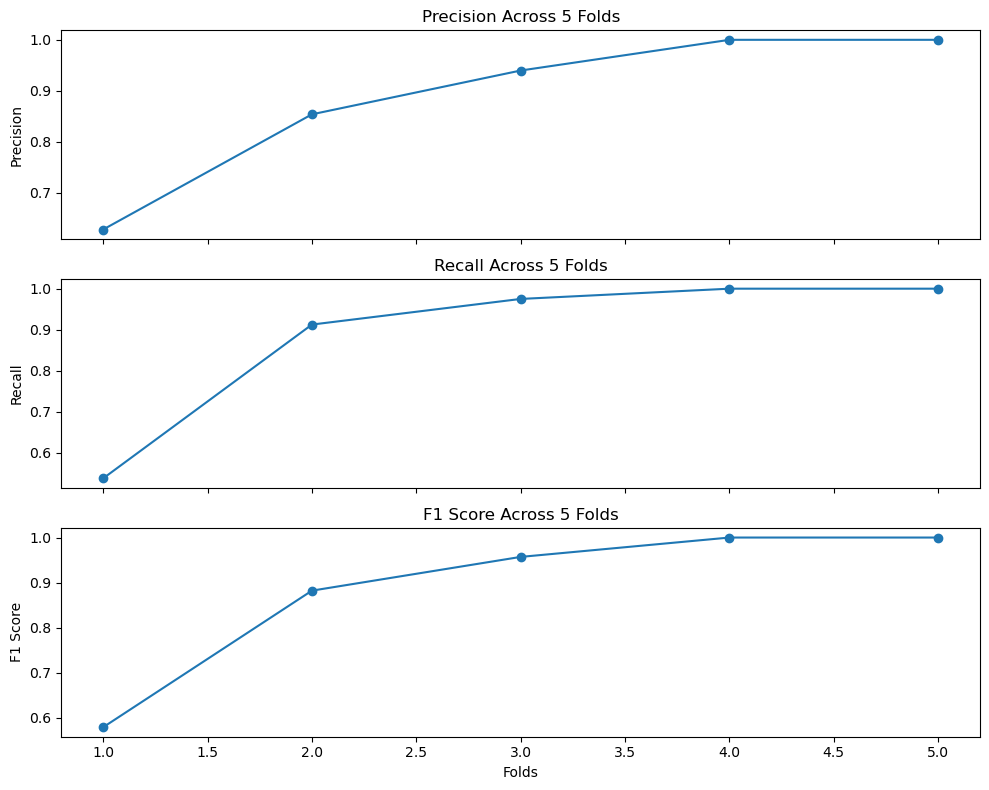

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
precision_list = [0.6277372262773723, 0.8538011695906432, 0.9397590361445783, 1.0, 1.0]
recall_list = [0.5375, 0.9125, 0.975, 1.0, 1.0]
f1_list = [0.5791245791245792, 0.8821752265861027, 0.9570552147239264, 1.0, 1.0]

# Create a figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot Precision
axes[0].plot(np.arange(1, 6), precision_list, marker='o')  # Use np.arange(1, 6) for x-axis ticks
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision Across 5 Folds')

# Plot Recall
axes[1].plot(np.arange(1, 6), recall_list, marker='o')  # Use np.arange(1, 6) for x-axis ticks
axes[1].set_ylabel('Recall')
axes[1].set_title('Recall Across 5 Folds')

# Plot F1 Score
axes[2].plot(np.arange(1, 6), f1_list, marker='o')  # Use np.arange(1, 6) for x-axis ticks
axes[2].set_ylabel('F1 Score')
axes[2].set_xlabel('Folds')
axes[2].set_title('F1 Score Across 5 Folds')

plt.tight_layout()
plt.show()


 UPDATE WEIRD NAMING OF MILLISECONDS: 
 Python script that reads each line from the input file, checks if it contains the specified ordered milliseconds, and converts the corresponding values:

In [35]:
def convert_milliseconds(line):
    # Mapping of original values to converted values
    conversion_mapping = {
        '2.900000e+02ms': '290ms',
        '3.000000e+02ms': '300ms',
        '3.100000e+02ms': '310ms',
        '3.500000e+02ms': '350ms',
        '3.600000e+02ms': '360ms',
        '2.100000e+02ms': '210ms',
        '2.200000e+02ms': '220ms',
        '2.400000e+02ms': '240ms',
    }

    # Iterate over the conversion mapping and replace values in the line
    for original_value, converted_value in conversion_mapping.items():
        line = line.replace(original_value, converted_value)

    return line

def process_file(input_file_path, output_file_path):
    # Read lines from the input file
    with open(input_file_path, 'r') as input_file:
        lines = input_file.readlines()

    # Process each line and write to the output file
    with open(output_file_path, 'w') as output_file:
        for line in lines:
            processed_line = convert_milliseconds(line)
            output_file.write(processed_line)

# Specify input and output file paths
input_file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/10 folds 80_20 split/classification results/10fold_classification_results_fold_10.txt'
output_file_path = input_file_path


# Call the function to process the file
process_file(input_file_path, output_file_path)


input_file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/5folds_classification_results_fold_1.txt'  # Replace with your actual file path
output_file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/5folds_classification_resultsUPDATED_fold_1.txt'  # Replace with your desired output file path


analysis of classification results: sorting them

In [7]:
# import os
# import shutil


# # Define the order of milliseconds
# ordered_milliseconds = [
#    '00ms', '10ms', '20ms', '30ms', '40ms', '50ms', '60ms', '70ms', '80ms', '90ms',
#    '100ms', '110ms', '120ms', '130ms', '140ms', '150ms', '160ms', '170ms', '180ms', '190ms',
#    '200ms', '210ms', '220ms', '230ms',
#    '240ms', '250ms', '260ms', '270ms', '280ms',
#    '290ms', '300ms', '310ms', '320ms', '330ms', '340ms',
#    '350ms', '360ms', '370ms', '380ms', '390ms'
# ]


# def copy_and_sort_images(input_file_path, output_file_path):
#    # Read the input data
#    with open(input_file_path, 'r') as file:
#        lines = file.readlines()


#    # Sort the lines based on milliseconds and subjects
#    sorted_lines = sorted(lines, key=lambda line: get_subject_and_millisecond_index(line))


#    # Write the sorted data to the output file
#    with open(output_file_path, 'w') as file:
#        file.writelines(sorted_lines)


#    # Extract image names and copy them to the new output directory
#    output_directory = os.path.dirname(output_file_path)
#    os.makedirs(output_directory, exist_ok=True)


#    for line in sorted_lines:
#        try:
#            image_name = line.split('\t')[0]
#            image_path = os.path.join(os.path.dirname(input_file_path), image_name)
#            shutil.copy(image_path, output_directory)
#        except Exception as e:
#            print(f"Error copying image: {e}")


# def get_subject_and_millisecond_index(line):
#    try:
#        subject_part = line.split('_millisecond_')[0]
#        milliseconds_part = line.split('_millisecond_')[1].split('ms')[0] + 'ms'
#        return subject_part, ordered_milliseconds.index(milliseconds_part)
#    except (IndexError, ValueError):
#        # Handle cases where the line format is incorrect or milliseconds are not in the ordered list
#        return '', float('inf')  # Place unmatched lines at the end


# # Specify the input and output file paths
# input_file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/5folds_classification_results_fold_5.txt'
# output_file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/5folds_classification_results_fold_5.txt'


# # Call the function to copy and sort images
# copy_and_sort_images(input_file_path, output_file_path)


Error copying image: [Errno 2] No such file or directory: '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/Image Name'
Error copying image: [Errno 2] No such file or directory: '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/Healthy_Subject_023_topographic_map_millisecond_2.100000e+02ms_sub-023.png'
Error copying image: [Errno 2] No such file or directory: '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/Healthy_Subject_023_topographic_map_millisecond_2.200000e+02ms_sub-023.png'
Error copying image: [Errno 2] No such file or directory: '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/Healthy_Subject_023_topographic_map_millisecond_2.400000e+02ms_sub-023.png'
Error copying image: [Errno 2] No such file or direc

Dr. Morris' array approach
fold_script_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/5folds_classification_results_fold_1.txt'


In [11]:
import numpy as np
import pandas as pd

# Define the order of milliseconds
ordered_milliseconds = [
    '00ms', '10ms', '20ms', '30ms', '40ms', '50ms', '60ms', '70ms', '80ms', '90ms',
    '100ms', '110ms', '120ms', '130ms', '140ms', '150ms', '160ms', '170ms', '180ms', '190ms',
    '200ms', '210ms', '220ms', '230ms',
    '240ms', '250ms', '260ms', '270ms', '280ms',
    '290ms', '300ms', '310ms', '320ms', '330ms', '340ms',
    '350ms', '360ms', '370ms', '380ms', '390ms'
]

# Initialize a 6x40 array filled with zeros (added two rows)
result_array = np.zeros((6, 40), dtype=int)

# Path to your fold script file
fold_script_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/5folds_classification_results_fold_5.txt'

# Read the fold script file and process each line
with open(fold_script_path, 'r') as file:
    # Iterate through each line
    for line_num, line in enumerate(file):
        # Skip the first line
        if line_num == 0:
            continue

        # Extract relevant information from the line
        tokens = line.split()

        # Find the column index corresponding to the milliseconds
        milliseconds_str = tokens[0].split('_millisecond_')[-1].split('_')[0]
        column_index = ordered_milliseconds.index(milliseconds_str)

        # Increment total counts
        if tokens[0].startswith('Healthy'):
            result_array[1][column_index] += 1
        elif tokens[0].startswith('Hearing'):
            result_array[3][column_index] += 1

        # Increment correct counts if true label and predicted label match
        if tokens[0].startswith('Healthy') and int(tokens[1]) == int(tokens[2]):
            result_array[0][column_index] += 1
        elif tokens[0].startswith('Hearing') and int(tokens[1]) == int(tokens[2]):
            result_array[2][column_index] += 1

# Calculate percentages for every column in rows 4, 5, and 6
result_array[4] = np.where(result_array[1] != 0, np.round(result_array[0] / result_array[1] * 100).astype(int), 0)
result_array[5] = np.where(result_array[3] != 0, np.round(result_array[2] / result_array[3] * 100).astype(int), 0)

# Print the result array
print(result_array)


# Print the required information
print("Milliseconds\tCorrect Healthy\tTotal Healthy\t% Correct Healthy\tCorrect Hearing Impaired\tTotal Hearing Impaired\t% Correct Hearing Impaired")
for i in range(len(ordered_milliseconds)):
    # Calculate percentages with a check for division by zero
    percent_healthy = result_array[0][i] / result_array[1][i] * 100 if result_array[1][i] != 0 else 0
    percent_impaired = result_array[2][i] / result_array[3][i] * 100 if result_array[3][i] != 0 else 0

    print(f"{ordered_milliseconds[i]}\t{result_array[0][i]}\t{result_array[1][i]}\t{percent_healthy:.2f}%"
          f"\t{result_array[2][i]}\t{result_array[3][i]}\t{percent_impaired:.2f}%")

# Convert the result array to a DataFrame with labels
df = pd.DataFrame(result_array, columns=ordered_milliseconds, index=[
    'Healthy Correct', 'Healthy Total', 'Impaired Correct', 'Impaired Total', 'Percent Correct Healthy', 'Percent Correct Impaired'
])

# Save the DataFrame to a CSV file
csv_file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/result_array.csv'
df.to_csv(csv_file_path)

# Print the DataFrame
print(df)

[[  3   4   4   4   4   4   4   4   4   4   4   3   4   4   4   4   4   4
    4   4   4   4   3   4   4   4   4   4   4   3   4   4   4   4   4   4
    4   4   4   3]
 [  4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4
    4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4
    4   4   4   4]
 [  4   3   3   4   4   4   4   4   3   4   3   4   4   4   3   4   4   4
    4   4   4   3   4   4   4   4   4   4   4   3   3   4   4   4   4   4
    4   3   4   4]
 [  4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4
    4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4
    4   4   4   4]
 [ 75 100 100 100 100 100 100 100 100 100 100  75 100 100 100 100 100 100
  100 100 100 100  75 100 100 100 100 100 100  75 100 100 100 100 100 100
  100 100 100  75]
 [100  75  75 100 100 100 100 100  75 100  75 100 100 100  75 100 100 100
  100 100 100  75 100 100 100 100 100 100 100  75  75 100 100 100 100 100
  100  75 100 100

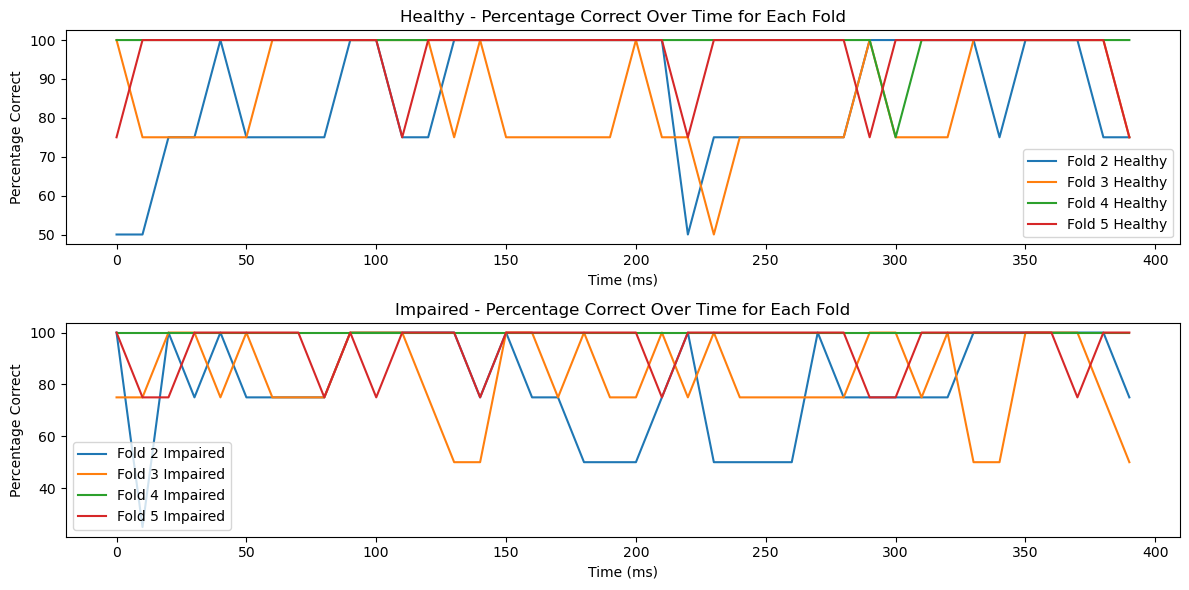

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Time': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
    'Fold 1 Healthy': [50,75,75,75,100,75,75,0,75,100,50,75,100,75,75,75,100,75,75,75,75,75,75,75,75,75,25,75,50,50,25,50,75,100,75,75,100,75,100,100],
    'Fold 1 Impaired': [75,75,50,50,25,50,25,50,50,75,50,50,75,50,75,50,50,100,100,100,75,75,25,50,75,100,75,25,25,25,0,25,0,50,50,50,50,50,100,50],
    'Fold 2 Healthy': [50,50,75,75,100,75,75,75,75,100,100,75,75,100,100,100,100,100,100,100,100,100,50,75,75,75,75,75,75,100,100,100,100,100,75,100,100,100,75,75],
    'Fold 2 Impaired': [100,25,100,75,100,75,75,75,75,100,100,100,100,100,75,100,75,75,50,50,50,75,100,50,50,50,50,100,75,75,75,75,75,100,100,100,100,100,100,75],
    'Fold 3 Healthy': [100,75,75,75,75,75,100,100,100,100,100,100,100,75,100,75,75,75,75,75,100,75,75,50,75,75,75,75,75,100,75,75,75,100,100,100,100,100,100,75],
    'Fold 3 Impaired': [75,75,100,100,75,100,75,75,75,100,100,100,75,50,50,100,100,75,100,75,75,100,75,100,75,75,75,75,75,100,100,75,100,50,50,100,100,100,75,50],
    'Fold 4 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100],
    'Fold 4 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 5 Healthy': [75,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,75],
    'Fold 5 Impaired': [100,75,75,100,100,100,100,100,75,100,75,100,100,100,75,100,100,100,100,100,100,75,100,100,100,100,100,100,100,75,75,100,100,100,100,100,100,75,100,100]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Healthy
plt.subplot(2, 1, 1)
for i in range(2, 6):
    plt.plot(df['Time'], df[f'Fold {i} Healthy'], label=f'Fold {i} Healthy')

plt.xlabel('Time (ms)')
plt.ylabel('Percentage Correct')
plt.title('Healthy - Percentage Correct Over Time for Each Fold')
plt.legend()

# Plot for Impaired
plt.subplot(2, 1, 2)
for i in range(2, 6):
    plt.plot(df['Time'], df[f'Fold {i} Impaired'], label=f'Fold {i} Impaired')

plt.xlabel('Time (ms)')
plt.ylabel('Percentage Correct')
plt.title('Impaired - Percentage Correct Over Time for Each Fold')
plt.legend()

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


Plots for 5 fold

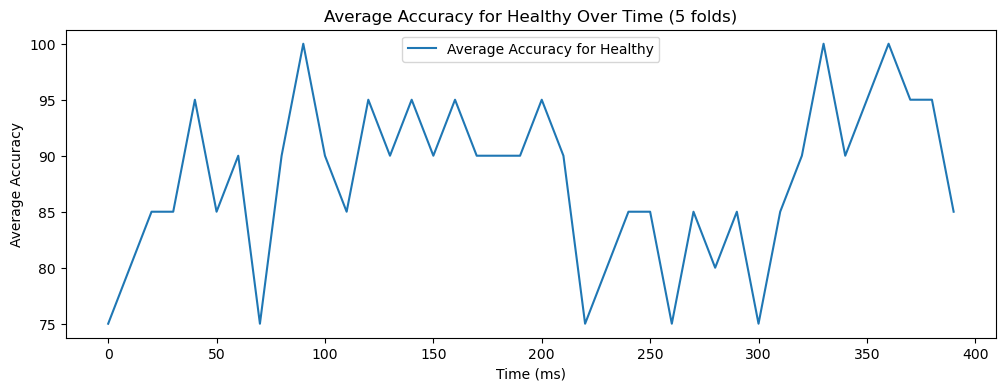

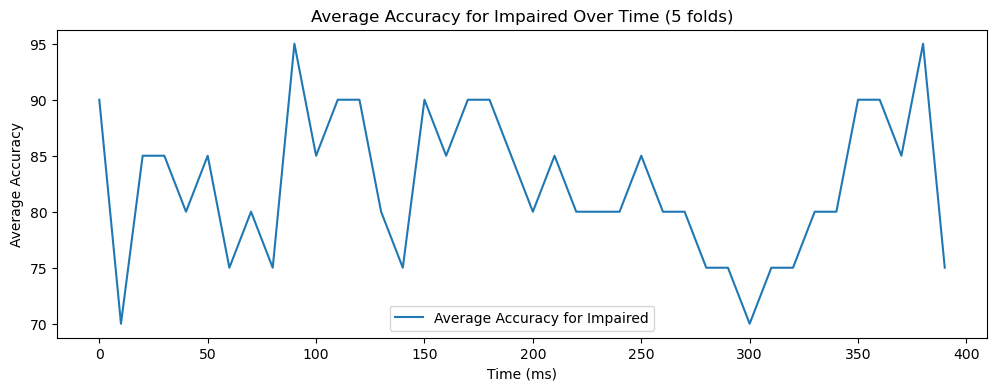

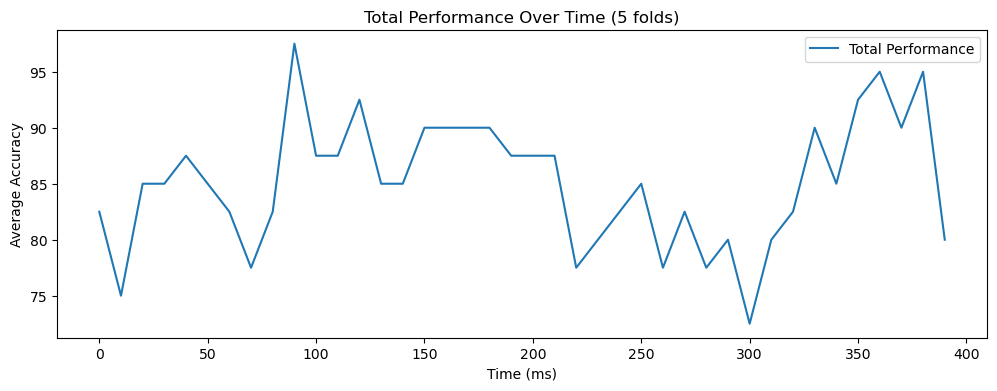

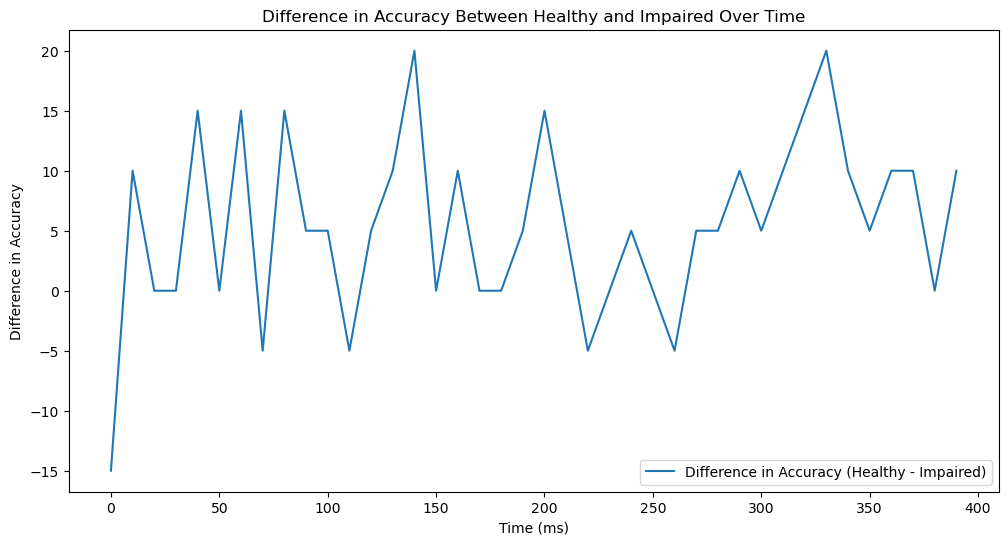

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Time': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
    'Fold 1 Healthy': [50,75,75,75,100,75,75,0,75,100,50,75,100,75,75,75,100,75,75,75,75,75,75,75,75,75,25,75,50,50,25,50,75,100,75,75,100,75,100,100],
    'Fold 1 Impaired': [75,75,50,50,25,50,25,50,50,75,50,50,75,50,75,50,50,100,100,100,75,75,25,50,75,100,75,25,25,25,0,25,0,50,50,50,50,50,100,50],
    'Fold 2 Healthy': [50,50,75,75,100,75,75,75,75,100,100,75,75,100,100,100,100,100,100,100,100,100,50,75,75,75,75,75,75,100,100,100,100,100,75,100,100,100,75,75],
    'Fold 2 Impaired': [100,25,100,75,100,75,75,75,75,100,100,100,100,100,75,100,75,75,50,50,50,75,100,50,50,50,50,100,75,75,75,75,75,100,100,100,100,100,100,75],
    'Fold 3 Healthy': [100,75,75,75,75,75,100,100,100,100,100,100,100,75,100,75,75,75,75,75,100,75,75,50,75,75,75,75,75,100,75,75,75,100,100,100,100,100,100,75],
    'Fold 3 Impaired': [75,75,100,100,75,100,75,75,75,100,100,100,75,50,50,100,100,75,100,75,75,100,75,100,75,75,75,75,75,100,100,75,100,50,50,100,100,100,75,50],
    'Fold 4 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100],
    'Fold 4 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 5 Healthy': [75,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,75],
    'Fold 5 Impaired': [100,75,75,100,100,100,100,100,75,100,75,100,100,100,75,100,100,100,100,100,100,75,100,100,100,100,100,100,100,75,75,100,100,100,100,100,100,75,100,100]
}

df = pd.DataFrame(data)
# Average Accuracy for Healthy
df_healthy = df.filter(like='Healthy').mean(axis=1)
plt.figure(figsize=(12, 4))
plt.plot(df['Time'], df_healthy, label='Average Accuracy for Healthy')
plt.xlabel('Time (ms)')
# plt.ylim(60, 110)  # Set y-axis limits
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for Healthy Over Time (5 folds)')
plt.legend()
plt.show()

# Average Accuracy for Impaired
df_impaired = df.filter(like='Impaired').mean(axis=1)
plt.figure(figsize=(12, 4))
plt.plot(df['Time'], df_impaired, label='Average Accuracy for Impaired')
plt.xlabel('Time (ms)')
plt.ylabel('Average Accuracy')
# plt.ylim(65, 105)  # Set y-axis limits
plt.title('Average Accuracy for Impaired Over Time (5 folds)')
plt.legend()
plt.show()

# Total Performance
# df_total = df[['Percent Correct Healthy', 'Percent Correct Impaired']].mean(axis=1)
df_total = df.iloc[:, 1:].mean(axis=1)
plt.figure(figsize=(12, 4))
plt.plot(df['Time'], df_total, label='Total Performance')
# plt.ylim(60, 110)  # Set y-axis limits
plt.xlabel('Time (ms)')
plt.ylabel('Average Accuracy')
plt.title('Total Performance Over Time (5 folds)')
plt.legend()
plt.show()


# Calculate the difference between Healthy and Impaired at each time point
df_difference = df_healthy - df_impaired

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df_difference, label='Difference in Accuracy (Healthy - Impaired)')
# plt.ylim(60, 110)  # Set y-axis limits

plt.xlabel('Time (ms)')
plt.ylabel('Difference in Accuracy')
plt.title('Difference in Accuracy Between Healthy and Impaired Over Time')
plt.legend()

# Display the plot
plt.show()



gathering accuracies for the 5 folds because I forgot to store it

In [15]:
import os
import pickle
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

# Path to the data directories
fold_data_dir = '/home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/5folds- 80-20 train test split'

# Data generator for testing (no validation)
data_generator = ImageDataGenerator(rescale=1.0/255.0)

# Lists to store results for each fold
fold_accuracies = []
img_width, img_height = 224, 224

for fold_number in range(1, 6):
 # Load the saved model for testing
    loaded_model = load_model(f'/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/model/model_fold_{fold_number}.h5')

    # Update fold path 
    fold_path = os.path.join(fold_data_dir, f'fold{fold_number}')

    # Testing data
    test_data_dir = os.path.join(fold_path, 'Testing')
    print(f"\nFold {fold_number} - Testing Data Directory:", test_data_dir)

    test_generator = data_generator.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

    print("Number of Test Samples:", test_generator.samples)

    # Evaluate the model on test data
    test_loss, test_accuracy = loaded_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
    print(f'\nEvaluation for Fold {fold_number}:')
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    # Store the accuracy for this fold
    fold_accuracies.append(test_accuracy)

# Save the accuracies to a file
with open('5folds_fold_accuracies.pkl', 'wb') as file:
    pickle.dump(fold_accuracies, file)


2024-01-14 18:40:18.328288: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 18:40:21.320981: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.



Fold 1 - Testing Data Directory: /home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/5folds- 80-20 train test split/fold1/Testing
Found 320 images belonging to 2 classes.
Number of Test Samples: 320


2024-01-14 18:40:25.290099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 309ms/step - loss: 2.1283 - accuracy: 0.6375

Evaluation for Fold 1:
Test Loss: 2.1282992362976074
Test Accuracy: 0.637499988079071

Fold 2 - Testing Data Directory: /home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/5folds- 80-20 train test split/fold2/Testing
Found 320 images belonging to 2 classes.
Number of Test Samples: 320


2024-01-14 18:40:35.895373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 326ms/step - loss: 0.9262 - accuracy: 0.8281

Evaluation for Fold 2:
Test Loss: 0.9262250661849976
Test Accuracy: 0.828125

Fold 3 - Testing Data Directory: /home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/5folds- 80-20 train test split/fold3/Testing
Found 320 images belonging to 2 classes.
Number of Test Samples: 320


2024-01-14 18:40:46.314989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 271ms/step - loss: 0.5716 - accuracy: 0.8375

Evaluation for Fold 3:
Test Loss: 0.5715558528900146
Test Accuracy: 0.8374999761581421

Fold 4 - Testing Data Directory: /home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/5folds- 80-20 train test split/fold4/Testing
Found 320 images belonging to 2 classes.
Number of Test Samples: 320


2024-01-14 18:40:57.411759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 261ms/step - loss: 0.0249 - accuracy: 0.9969

Evaluation for Fold 4:
Test Loss: 0.024907058104872704
Test Accuracy: 0.996874988079071

Fold 5 - Testing Data Directory: /home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/5folds- 80-20 train test split/fold5/Testing
Found 320 images belonging to 2 classes.
Number of Test Samples: 320


2024-01-14 18:41:06.299604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 316ms/step - loss: 0.1731 - accuracy: 0.9563

Evaluation for Fold 5:
Test Loss: 0.17311403155326843
Test Accuracy: 0.956250011920929


printing the accuracies

In [17]:
import pickle

# Specify the file path
file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/5folds_fold_accuracies.pkl'

# Open the file in binary mode for reading
with open(file_path, 'rb') as file:
    # Load the pickled data
    accuracies = pickle.load(file)

# Now, 'accuracies' variable contains the data from the pickle file
print("Accuracies:", accuracies)


Accuracies: [0.637499988079071, 0.828125, 0.8374999761581421, 0.996874988079071, 0.956250011920929]


printing precision recall and f1

Length of Precision List: 5
Length of Recall List: 5
Length of F1 List: 5
Length of Precision Combined List: 5
Length of Recall Combined List: 5
Length of F1 Score Combined List: 5


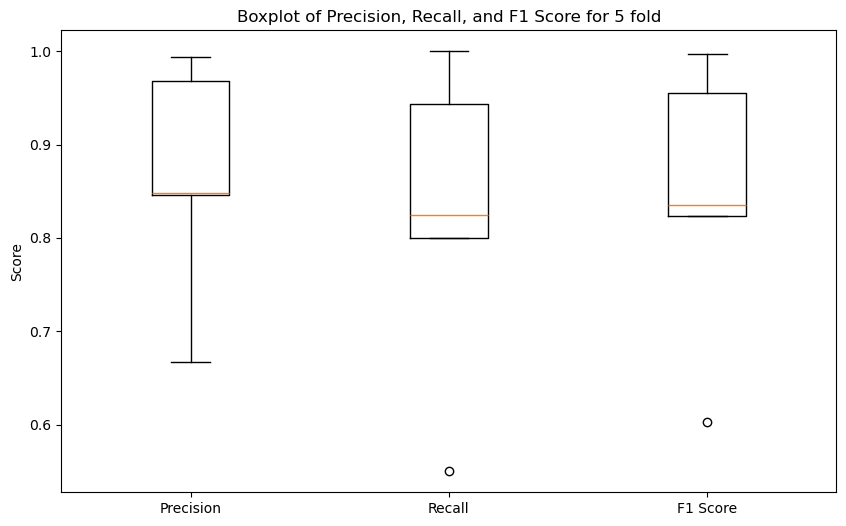

ValueError: All arrays must be of the same length

In [26]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the file path
file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/evaluation_results.pkl'

# Load the results from the file
with open(file_path, 'rb') as file:
    loaded_results = pickle.load(file)

# Access individual lists
precision_list_loaded = loaded_results['precision_list']
recall_list_loaded = loaded_results['recall_list']
f1_list_loaded = loaded_results['f1_list']

# Print the lengths of the loaded lists
print("Length of Precision List:", len(precision_list_loaded))
print("Length of Recall List:", len(recall_list_loaded))
print("Length of F1 List:", len(f1_list_loaded))

# Combine the lists into a single list of lists
data = [precision_list_loaded, recall_list_loaded, f1_list_loaded]

# Print the lengths of the combined lists
for i, metric_data in enumerate(data, 1):
    print(f"Length of {['Precision', 'Recall', 'F1 Score'][i-1]} Combined List:", len(metric_data))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplot
bp = ax.boxplot(data, labels=['Precision', 'Recall', 'F1 Score'])

# Set labels and title
ax.set_ylabel('Score')
ax.set_title('Boxplot of Precision, Recall, and F1 Score for 5 fold')

# Show the plot
plt.show()

# Create a DataFrame for easy summary and visualization
df_results = pd.DataFrame({
    'Fold': range(1, 6),
    'Metric': ['Precision'] * 5 + ['Recall'] * 5 + ['F1 Score'] * 5,
    'Score': precision_list_loaded + recall_list_loaded + f1_list_loaded
})

# Visualize the results with a single boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Score', data=df_results)
plt.title('Performance Across 5-Folds')
plt.show()

# Summary table
summary_table = df_results.groupby('Metric')['Score'].describe()[['min', 'mean', 'max']]
summary_table.columns = ['Worst Fold', 'Avg. Fold', 'Best Fold']
print("\nSummary of Results:")
print(summary_table)
